In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
import pandas as pd
%matplotlib notebook

In [19]:
alpha = 0.1
gamma = 2.5
mumax = 0.05
thetamax = 0.05
PO = 1.5

Km = 0.001

def beta(beta):
    nul1 = (1 + alpha)*4 - ((4 + 1*1.8 - 2*0.5 - 3*0.2) + 2*beta)
    return nul1
beta = fsolve(beta, alpha)[0]

tmax = 150
cS0 = 20
cX0 = 0.1

kLa = 200 # 1/h
cOsatmax = 7/1000/32  #mol/l
rOmt = kLa*cOsatmax

In [20]:
Sflux = np.matrix([[-1,  1 + alpha, 1,      1,   0,    0,    0],
                   [0,   0,         0,      -1,  3/2,  1.2,  0],
                   [0,   beta,      2,      1/3, -1/2, 1/5,  -2],
                   [0,   -gamma,    1/2,    1/3, 0,    0,    2*PO]])
#                   rS,  rX,        r_resp, r3,  rEt,  rIta, rO
#                   r[0] r[1]       r[2]         r[4]  r[5]  r[6]
Et_spec = [0, 0, 0, 0, 1, 0, 0]
O_spec = [0, 0, 0, 0, 0, 0, 1]
resp_spec = [0, 0, 1, 0, 0, 0, 0]
Ita_spec = [0, 0, 0, 0, 0, 1, 0]
mu_spec = [0, 1, 0, 0, 0, 0, 0]
S_spec = [1, 0, 0, 0, 0, 0, 0]

In [21]:
S1 = np.vstack([Sflux, Et_spec, mu_spec, Ita_spec])
S2 = np.vstack([Sflux, Et_spec, mu_spec, O_spec])
S3 = np.vstack([Sflux, Et_spec, resp_spec, O_spec])

# C1 = np.array([0, 0, 0, theta, 0, mu, 0])
# C2 = np.array([0, 0, 0, theta, 0, mu, rOmt/cX])
# C3 = np.array([0, 0, 0, theta, 0, 0, rOmt/cX])
# r1 = np.linalg.solve(S1, C1)
# r2 = np.linalg.solve(S2, C2)
# r3 = np.linalg.solve(S3, C3)

In [22]:
def rate(var):
    cS, cX, cI = var
    
    mu = mumax*cS/(Km + cS)
    if mu < 0.00001:
        mu = 0
    theta = thetamax*cS/(Km + cS)
    
    C1 = np.array([0, 0, 0, theta, 0, mu, 0])
    r1 = np.linalg.solve(S1, C1)
    
    C2 = np.array([0, 0, 0, theta, 0, mu, rOmt/cX])
    r2 = np.linalg.solve(S2, C2)
    
    C3 = np.array([0, 0, 0, theta, 0, 0, rOmt/cX])
    r3 = np.linalg.solve(S3, C3)
    
    r = r1
    
    if rOmt < r1[6]*cX:
        r = r2
        if r2[2] < 0:
            r = r3
    return r

In [23]:
def batch(var, t):
    cS, cX, cI = var
    dcSdt = -rate(var)[0]*cX
    dcXdt = rate(var)[1]*cX
    dcIdt = rate(var)[5]*cX
    return dcSdt, dcXdt, dcIdt

In [24]:
tspan = np.linspace(0, 150, 1000)

cS0 = 20
cX0 = 0.1
cI0 = 0
ci0 = [cS0, cX0, cI0]

ci = odeint(batch, ci0, tspan)
cS, cX, cI = ci.T

ri = np.asarray([rate([cSi, cXi, cIi]) for [cSi, cXi, cIi] in ci])
rS = ri[:, 0]
rX = ri[:, 1]
r_resp = ri[:, 2]
rI = ri[:, 5]
rO = ri[:, 6]
rC = alpha*ri[:, 1] + ri[:, 2] + 1/2*ri[:, 4] + 1/5*ri[:, 5]

rATP = -gamma*ri[:, 1] + 1/2*ri[:, 2] + 1/3*ri[:, 3] + 2*PO*ri[:, 6]

<IPython.core.display.Javascript object>


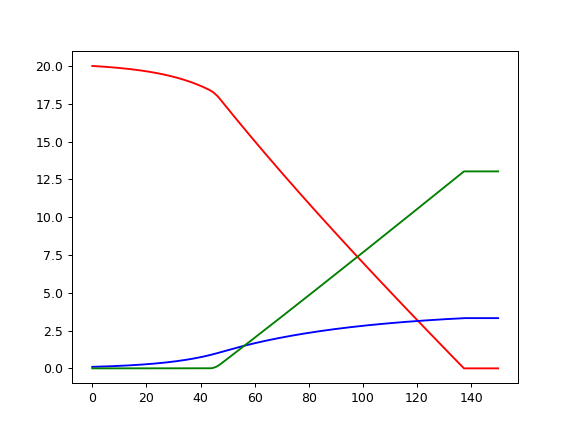

In [25]:
plt.figure(1)
plt.plot(tspan, cS, 'r')
plt.plot(tspan, cX, 'b')
plt.plot(tspan, cI, 'g')

<IPython.core.display.Javascript object>


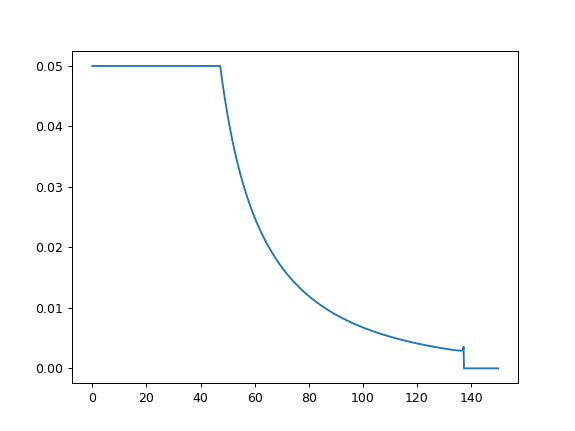

In [26]:
plt.figure(2)
plt.plot(tspan, rX)
plt.show()

<IPython.core.display.Javascript object>


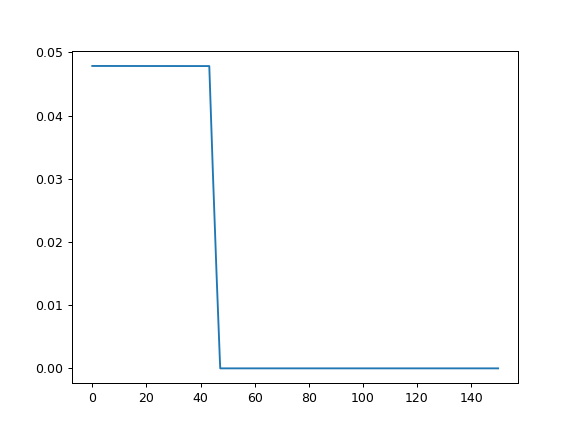

In [27]:
plt.figure(3)
plt.plot(tspan, r_resp)
plt.show()

<IPython.core.display.Javascript object>


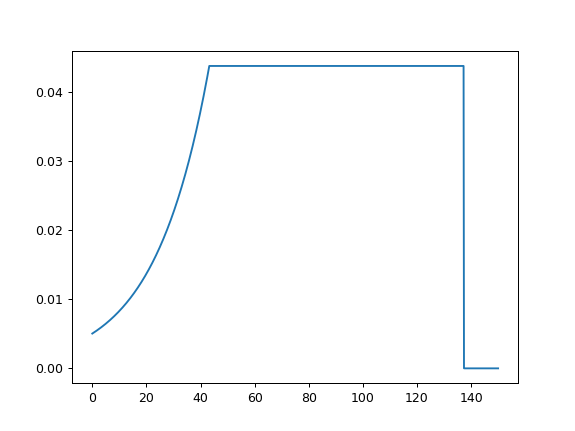

In [28]:
plt.figure(4)
plt.plot(tspan, rO*cX)
plt.show()

<IPython.core.display.Javascript object>


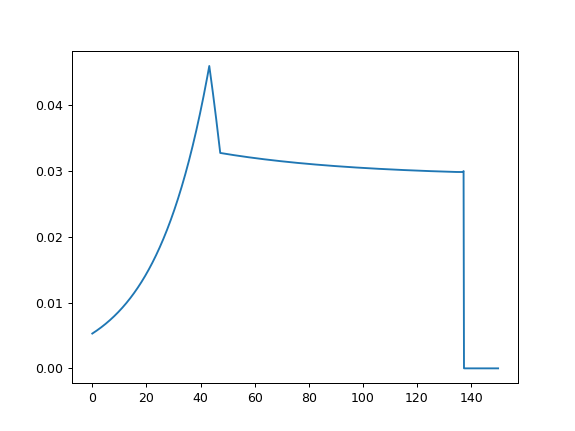

In [29]:
plt.figure(5)
plt.plot(tspan, rC*cX)
plt.show()

<IPython.core.display.Javascript object>


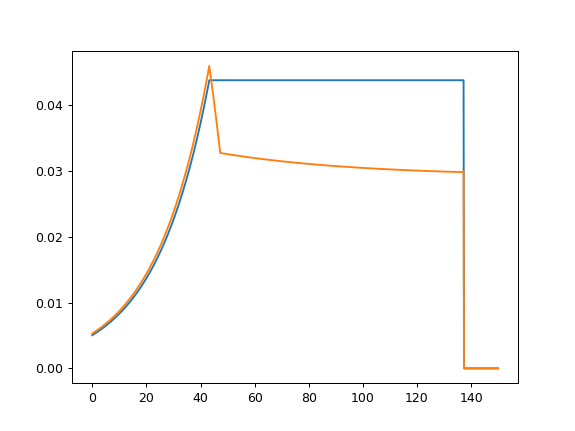

In [30]:
plt.figure(6)
plt.plot(tspan, rO*cX)
plt.plot(tspan, rC*cX)
plt.show()

In [31]:
YOATP = rATP/rO

<IPython.core.display.Javascript object>


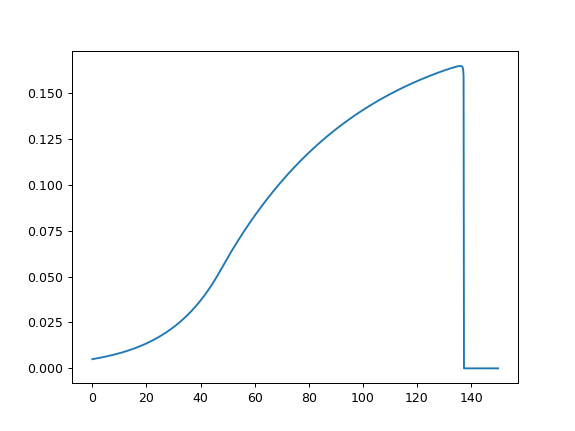

In [32]:
plt.figure(7)
plt.plot(tspan, rATP*cX)
plt.show()

<IPython.core.display.Javascript object>


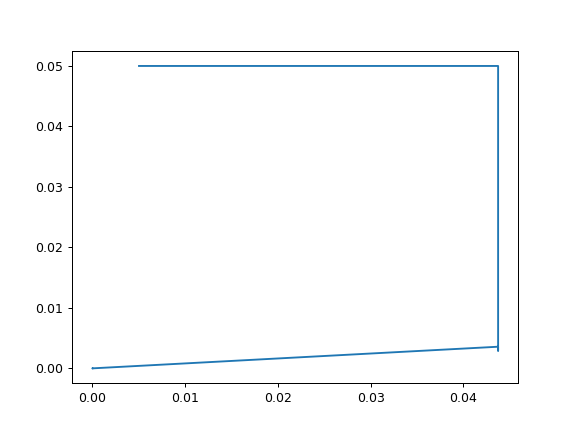

In [33]:
plt.figure(8)
plt.plot(rO*cX, rX)
plt.show()

<IPython.core.display.Javascript object>


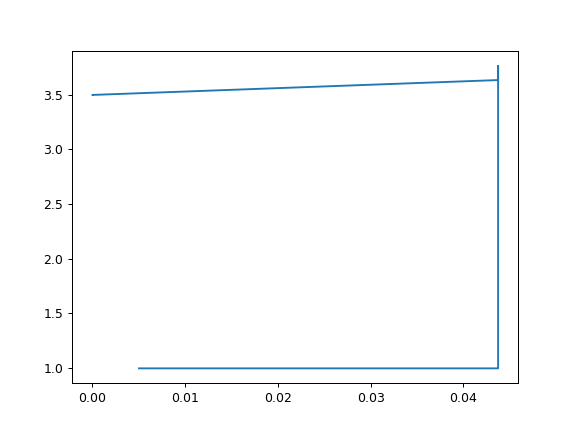

In [34]:
plt.figure(9)
plt.plot(rO*cX, YOATP)
plt.show()